## Maximum Likelihood Estimation

**Density estimation is the problem of estimating the probability distribution for a sample of observations from a problem domain.**

Maximum likelihood estimation involves defining a likelihood function
for calculating the conditional probability of observing the data sample given a probability
distribution and distribution parameters. This approach can be used to search a space of possible
distributions and parameters

> Maximum Likelihood Estimation is a probabilistic framework for solving the problem of
density estimation.

> It involves maximizing a likelihood function in order to find the probability distribution
and parameters that best explain the observed data.

> It provides a framework for predictive modeling in machine learning where finding model
parameters can be framed as an optimization problem.

A common modeling problem involves how to estimate a joint probability distribution for a
dataset. For example, given a sample of observation (X) from a domain (x1; x2; x3; . . . ; xn),
where each observation is drawn independently from the domain with the same probability
distribution (so-called independent and identically distributed, i.i.d., or close to it). Density
estimation involves selecting a probability distribution function and the parameters of that
distribution that best explain the joint probability distribution of the observed data (X).
> How do you choose the probability distribution function?

> How do you choose the parameters for the probability distribution function?

This problem is made more challenging if the sample (X) drawn from the population is
small and has noise, meaning that any evaluation of an estimated probability density function
and its parameters will have some error. There are many techniques for solving this problem,
although two common approaches are:

> Maximum a Posteriori (MAP), a Bayesian method.

> Maximum Likelihood Estimation (MLE), frequentist method.

The main difference is that MLE assumes that all solutions are equally likely beforehand,
whereas MAP allows prior information about the form of the solution to be harnessed.

it involves defining a parameter called theta
(THETA) that defines both the choice of the probability density function and the parameters of that
distribution. It may be a vector of numerical values whose values change smoothly and map to
different probability distributions and their parameters. In Maximum Likelihood Estimation, we
wish to maximize the probability of observing the data from the joint probability distribution
given a specific probability distribution and its parameters, stated formally as:
> `P(X;THETA)` # Semicolon used to represent conditonal P(), as Theta is unk

This resulting conditional probability is referred to as the likelihood of observing the data
given the model parameters and written using the notation L() to denote the likelihood function.
For example:
> `L(X; THETA)`

The objective of Maximum Likelihood Estimation is to find the set of parameters (THETA) that
maximize the likelihood function, e.g. result in the largest likelihood value.
> `max L(X; THETA)`

The joint probability distribution can be restated as the multiplication of the conditional
probability for observing each example given the distribution parameters.
> `PI(1 to n) P(xi;THETA)` => `SIGMA(1 to n) log P(xi;THETA)`

---------------------------------------------------------------------------
Given the frequent use of log in the likelihood function, it is commonly referred to as a
log-likelihood function. It is common in optimization problems to prefer to minimize the cost
function, rather than to maximize it. Therefore, the negative of the log-likelihood function is
used, referred to generally as a Negative Log-Likelihood (NLL) function.
> `min( -SIGMA(1 to n) log P(xi; THETA) )`

In relation to ML, the choice of model and model parameters is referred to as a modeling
hypothesis h, and the problem involves finding h that best explains the data X.
>`P(X; h)`

We can, therefore, find the modeling hypothesis that maximizes the likelihood function.
max L(X; h)

This provides the basis for estimating the probability density of a dataset, typically used in
unsupervised machine learning algorithms; for example:

> **Clustering algorithms**.
Using the expected log joint probability as a key quantity for learning in a probability
model with hidden variables is better known in the context of the celebrated
expectation maximization or EM algorithm.


The Maximum Likelihood Estimation framework is also a useful tool for supervised machine
learning. This applies to data where we have input and output variables, where the output
variable may be a numerical value or a class label in the case of regression and classifition
predictive modeling retrospectively. We can state this as the conditional probability of the
output y given the input (X) given the modeling hypothesis (h).
> `max L(y|X ; h)`

## Linear Regression with MLE

under certain assumptions any learning algorithm that minimizes the squared
error between the output hypothesis pre- dictions and the training data will output
a maximum likelihood hypothesis.

## Logistic Regression

In [9]:
prob = 0.8 # p() of success
odds = prob/(1-prob)
print("Odds of success: ",odds)
#convert back to probab
p = odds/(1+odds)
print("Back to P(): ",p)

Odds of success:  4.000000000000001
Back to P():  0.8


Let's extend this example and convert the odds to log-odds and then convert the log-odds
back into the original probability. This final conversion is effectively the form of the logistic
regression model, or the logistic function. The complete example is listed below.

In [10]:
import math

prob = 0.8

odds = prob/(1-prob)
print("Odds: ",odds)
log_odds = math.log(odds)
print("log-odds: ",log_odds)
# converting back to p
p = 1 / (1 + math.exp(-log_odds))
print("Back to p: ",p)

Odds:  4.000000000000001
log-odds:  1.3862943611198908
Back to p:  0.8


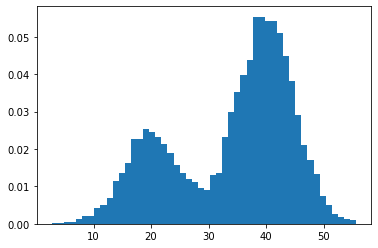

In [11]:
from numpy import hstack
from numpy.random import normal
from matplotlib import pyplot
# generate a sample
X1 = normal(loc=20, scale=5, size=3000)
X2 = normal(loc=40, scale=5, size=7000)
X = hstack((X1, X2))
# plot the histogram
pyplot.hist(X, bins=50, density=True)
pyplot.show()

In [24]:
X= X.reshape(-1,1)

In [25]:
from sklearn.mixture import GaussianMixture

For example, we can
estimate the latent variable for the points in the training dataset and we would expect the first
3,000 points to belong to one process (e.g. value=1) and the next 7,000 data points to belong
to another process (e.g. value=0).

In [48]:
model = GaussianMixture(n_components=2,init_params='random')
model.fit(X)

yhat = model.predict(X)
#check latent values for first few points
print(yhat[:100])
# check latent value for last few points
print(yhat[-100:])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0]
[1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1
 0 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 1 0]


In [49]:
model.aic(X)

75196.07979374082

In [50]:
model.bic(X)

75232.1314956007

# AIC , BIC and MDL example

In [51]:
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [52]:
X, y = make_regression(n_samples=100, n_features=2, noise=0.1)
# define and fit the model on all data
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [53]:
num_params = len(model.coef_) + 1
print('Number of parameters: %d' % (num_params))

Number of parameters: 3


In [54]:
yhat = model.predict(X)
mse = mean_squared_error(y, yhat)
print('MSE: %.3f' % mse)

MSE: 0.011


Next, we can adapt the example to calculate the AIC for the model.

> `AIC = n * LL + 2 * k`
where n = No. of samples, LL = log likelihood for the model , here logarithm of Mean_squared_error; LL = log(MSE), k = model paramters

In [56]:
def AIC(n,L,k):
    aic = n * math.log(L) + (2 * k)
    return aic

In [57]:
AIC(100,mse,num_params)

-447.98124884205976

In [58]:
# Now, BIC = n * LL + k * log(n)

def BIC(n,L,k):
    bic = n * math.log(LL) + (k * math.log(n))
    return bic

In [59]:
BIC(100,mse,num_params)

-440.1657382840955

## Naive Bayes Example

In [60]:
from sklearn.datasets import make_blobs
X,y = make_blobs(n_samples=100, centers=2, n_features=2, random_state=1)

print(X.shape,y.shape)
print(X[:5])
print(y[:5])

(100, 2) (100,)
[[-0.79415228  2.10495117]
 [-9.15155186 -4.81286449]
 [-3.10367371  3.90202401]
 [-1.42946517  5.16850105]
 [-7.4693868  -4.20198333]]
[0 1 0 0 1]


We will model the numerical input variables using a Gaussian probability distribution.
This can be achieved using the norm SciPy API. First, the distribution can be constructed by
specifying the parameters of the distribution, e.g. the mean and standard deviation, then the
probability density function can be sampled for specific values using the norm.pdf() function.
We can estimate the parameters of the distribution from the dataset using the mean() and
std() NumPy functions. The fit distribution() function below takes a sample of data for
one variable and fits a data distribution.

In [72]:
from scipy.stats import norm
import numpy as np

def fit_distribution(data):
    mu = np.mean(data)
    sigma = np.std(data)
    print(mu,sigma)
    dist = norm(mu,sigma)
    return dist

In [73]:
# sort data into classes
Xy0 = X[y==0]
Xy1 = X[y==1]
print(Xy0.shape,Xy1.shape)

# calculate priors
priory0 = len(Xy0) / len(X) #P(y=0)
priory1 = len(Xy1) / len(X) #P(y=1)
print(priory0,priory1)

(50, 2) (50, 2)
0.5 0.5


Finally, we can call the fit distribution() function that we defined to prepare a probability
distribution for each variable, for each class label.

In [74]:
# create PDFs for y==0
X1y0 = fit_distribution(Xy0[:,0])
X2y0 = fit_distribution(Xy0[:,1])

# create PDFs for y==1
X1y1 = fit_distribution(Xy1[:,0])
X2y1 = fit_distribution(Xy1[:,1])

-1.5632888906409914 0.787444265443213
4.426680361487157 0.958296071258367
-9.681177100524485 0.8943078901048118
-3.9713794295185845 0.9308177595208521


Next, we can use the prepared probabilistic model to make a prediction. The independent
conditional probability for each class label can be calculated using the prior for the class (50%)
and the conditional probability of the value for each variable. The probability() function
below performs this calculation for one input example (array of two values) given the prior
and conditional probability distribution for each variable. The value returned is a score rather
than a probability as the quantity is not normalized, a simplification often performed when
implementing Naive Bayes.

In [75]:
def probability(X,prior,dist1,dist2):
    return prior * dist1.pdf(X[0]) * dist2.pdf(X[1])

We can use this function to calculate the probability for an example belonging to each class.
First, we can select an example to be classified; in this case, the first example in the dataset.

In [77]:
Xsample, ysample = X[0], y[0]

py0 = probability(Xsample, priory0, X1y0, X2y0)
py1 = probability(Xsample, priory1, X1y1, X2y1)

print('P(y=0 | %s) = %.3f' % (Xsample, py0*100))
print('P(y=1 | %s) = %.3f' % (Xsample, py1*100))
print('Truth: y=%d' % ysample)

#The class with the largest score will be the resulting classification.

P(y=0 | [-0.79415228  2.10495117]) = 0.348
P(y=1 | [-0.79415228  2.10495117]) = 0.000
Truth: y=0


In [80]:
# using sklearn

from sklearn.datasets import make_blobs
from sklearn.naive_bayes import GaussianNB

X, y = make_blobs(n_samples=100, centers=2, n_features=2, random_state=1)

model = GaussianNB()
model.fit(X,y)
Xsample,ysample = [X[0]], y[0]

yhat_prob = model.predict_proba(Xsample)
print(yhat_prob)
yhat_class = model.predict(Xsample)
print(yhat_class)
print("Truth", ysample)

[[1.00000000e+00 5.52387327e-30]]
[0]
Truth 0


## Bayesian Optimization from Scratch

The first step is to define a test problem. We will use a multimodal problem with five peaks,
calculated as: `y = x^2 * sin(5 * PI * x)^6`

> Where x is a real value in the range [0,1]

We will augment this
function by adding Gaussian noise with a mean of zero and a standard deviation of 0.1. This
will mean that the real evaluation will have a positive or negative random value added to it,
making the function challenging to optimize. The objective() function below implements this.

In [84]:
def objective(x,noise=0.1):
    noise = np.random.normal(loc=0,scale=noise)
    return (x**2 * np.sin(5 * np.pi * x)**6) + noise

We can test this function by first defining a grid-based sample of inputs from 0 to 1 with a
step size of 0.01 across the domain.

In [123]:
X = np.arange(0,1,0.01)

We can then evaluate these samples using the objective function without any noise to see
what the real objective function looks like.

In [124]:
y = [objective(x,0) for x in X]
# sample the domain with noise
ynoise = [objective(x) for x in X]

In [125]:
# find best result for non noisy
ix = np.argmax(y)
print("Optima: x=%.3f, y=%.3f" % (X[ix],y[ix]))

Optima: x=0.900, y=0.810


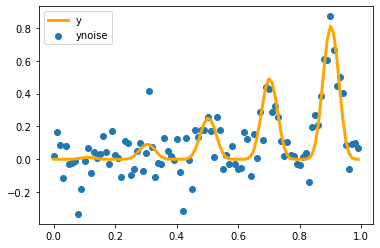

In [126]:
#plot points with noise
pyplot.scatter(X,ynoise,label='ynoise')
pyplot.plot(X,y,c='orange',label='y',linewidth=3)
pyplot.legend()
pyplot.show()

**Surrogate Function**

The surrogate function is a technique used to best approximate the mapping of input examples
to an output score. Probabilistically, it summarizes the conditional probability of an objective
function (f), given the available data (D) or P(fjD). A number of techniques can be used for
this, although the most popular is to treat the problem as a regression predictive modeling
problem with the data representing the input and the score representing the output to the
model. This is often best modeled using a random forest or a Gaussian Process. A Gaussian
Process, or GP, is a model that constructs a joint probability distribution over the variables,
assuming a multivariate Gaussian distribution. As such, it is capable of effcient and effective
summarization of a large number of functions and smooth transition as more observations are
made available to the model.
This smooth structure and smooth transition to new functions based on data are desirable
properties as we sample the domain, and the multivariate Gaussian basis to the model means
that an estimate from the model will be a mean of a distribution with a standard deviation;
that will be helpful later in the acquisition function. As such, using a GP regression model is
often preferred.

We can fit a GP regression model using the GaussianProcessRegressor scikit-learn implementation
from a sample of inputs (X) and noisy evaluations from the objective function
(y). First, the model must be defined. An important aspect in defining the GP model is the
kernel. This controls the shape of the function at specific points based on distance measures
between actual data observations. Many different kernel functions can be used, and some may
offer better performance for specific datasets. By default, a Radial Basis Function, or RBF, is
used that can work well.

In [153]:
from sklearn.gaussian_process import GaussianProcessRegressor
from warnings import catch_warnings
from warnings import simplefilter

model = GaussianProcessRegressor()

In [154]:
X = X.reshape(-1,1)

In [155]:
model.fit(X,y)

GaussianProcessRegressor()

The model will estimate the cost for one or more samples provided to it. The model is
used by calling the predict() function. The result for a given sample will be a mean of the
distribution at that point. We can also get the standard deviation of the distribution at that
point in the function by specifying the argument return std=True;

In [163]:
# mean,std = model.predict(X,return_std=True)
# mean.shape,std.shape

In [131]:
def surrogate(model,X):
    with catch_warnings():
        simplefilter('ignore')
        return model.predict(X,return_std=True)

We can call this function any time to estimate the cost of one or more samples, such as when
we want to optimize the acquisition function in the next section. For now, it is interesting to
see what the surrogate function looks like across the domain after it is trained on a random
sample. We can achieve this by first fitting the GP model on a random sample of 100 data
points and their real objective function values with noise. We can then plot a scatter plot of
these points. Next, we can perform a grid-based sample across the input domain and estimate the cost at each point using the surrogate function and plot the result as a line. We would
expect the surrogate function to have a crude approximation of the true non-noisy objective
function. The plot() function below creates this plot, given the random data sample of the
real noisy objective function and the fit model.

**Acquisition Function**

The surrogate function is used to test a range of candidate samples in the domain. From these
results, one or more candidates can be selected and evaluated with the real, and in normal
practice, computationally expensive cost function. This involves two pieces: the search strategy
used to navigate the domain in response to the surrogate function and the acquisition function
that is used to interpret and score the response from the surrogate function. A simple search
strategy, such as a random sample or grid-based sample, can be used, although it is more
common to use a local search strategy, such as the popular BFGS algorithm. In this case, we
will use a random search or random sample of the domain in order to keep the example simple.
This involves first drawing a random sample of candidate samples from the domain, evaluating
them with the acquisition function, then maximizing the acquisition function or choosing the
candidate sample that gives the best score. The opt acquisition() function below implements
this.

In [148]:
def opt_acquisition(X,y,model):
    Xsamples = np.random.random(100)
    Xsamples = Xsamples.reshape(-1,1)
    # calculate the acquisition(X,Xsamples,model)
    scores = acquisition(X,Xsamples,model)
    # locate the index of the largest scores
    ix = np.argmax(scores)
    return Xsamples[ix,0]

In [145]:
from scipy.stats import norm
def acquisition(X,Xsamples,model):
    #calculate best surrogate score found so far
    yhat, _ = surrogate(model,X)
#     print(_,_.shape,end="\n\n\n")
    best = max(yhat)
    #calculate mean and std via surrogate fn
    mu,std = surrogate(model,Xsamples)
#     print(mu)
    mu = mu[:,0]
    #calculate the P() of imporvement
    probs = norm.cdf((mu-best) / (std+1e-9))
    return probs

In [135]:
def plot(X,y,model):
    pyplot.scatter(X,y)
    Xsamples = np.array(np.arange(0,1,0.001))
    Xsamples  =Xsamples.reshape(-1,1)
    ysamples, _ = surrogate(model,Xsamples)
    pyplot.plot(Xsamples,ysamples)
    pyplot.show()

>x=0.896, f()=0.676004, actual=0.867
>x=0.840, f()=0.481300, actual=0.027
>x=0.613, f()=0.084280, actual=-0.050
>x=0.903, f()=0.677441, actual=0.782
>x=0.890, f()=0.667463, actual=0.782
>x=0.932, f()=0.582132, actual=0.178
>x=0.451, f()=0.096506, actual=-0.040
>x=0.406, f()=0.043360, actual=0.090
>x=0.024, f()=-0.038086, actual=0.223
>x=0.887, f()=0.659290, actual=0.703
>x=0.736, f()=0.068453, actual=0.319
>x=0.995, f()=-0.748857, actual=0.088
>x=0.885, f()=0.635201, actual=0.506
>x=0.713, f()=0.062298, actual=0.316
>x=0.909, f()=0.665237, actual=0.825
>x=0.904, f()=0.666988, actual=0.858
>x=0.904, f()=0.669384, actual=0.879
>x=0.909, f()=0.672588, actual=0.771
>x=0.916, f()=0.667789, actual=0.671
>x=0.925, f()=0.648064, actual=0.376
>x=0.920, f()=0.656452, actual=0.578
>x=0.896, f()=0.662064, actual=0.932
>x=0.375, f()=0.017296, actual=0.049
>x=0.271, f()=-0.022469, actual=0.124
>x=0.253, f()=-0.012495, actual=-0.077
>x=0.142, f()=0.042936, actual=-0.035
>x=0.909, f()=0.672192, actual

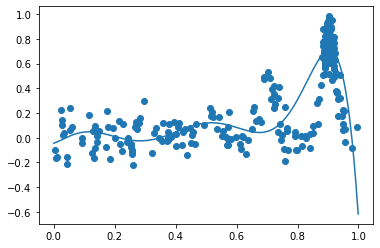

Best Result: x=0.905, y=0.983


In [152]:
#performing the optimization process
for i in range(100):
    # select the next point to sample
    x = opt_acquisition(X,y,model)
    # sample the point
    actual = objective(x)
    # summarize the finding for our own reporting
    est, _ = surrogate(model,[[x]])
    print('>x=%.3f, f()=%3f, actual=%.3f' % (x, est, actual))
    # add the data to the dataset
    X = np.vstack((X,[[x]]))
    y = np.vstack((y,[[actual]]))
    # update the model
    model.fit(X,y)
    
    
# plot all samples and the final surrogate function
plot(X,y,model)
# best result
ix = np.argmax(y)
print('Best Result: x=%.3f, y=%.3f' % (X[ix], y[ix]))

## Hyperparameter tuning with BO in scikit-optimize

In [166]:
from numpy import mean
from sklearn.datasets import make_blobs
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from skopt.space import Integer
from skopt.utils import use_named_args
from skopt import gp_minimize

In [167]:
X, y = make_blobs(n_samples=500,n_features=2,centers=3)
model = KNeighborsClassifier() 

In [168]:
# define the space of hyperparameters to search
search_space = [Integer(1,5, name='n_neighbors'), Integer(1,2,name='p')]

In [169]:
@use_named_args(search_space)
def evaluate_model(**params):
    model.set_params(**params)
    result = cross_val_score(model,X,y,cv=5,n_jobs=-1,scoring='accuracy')
    estimate = mean(result)
    return 1.0 - estimate

In [170]:
result = gp_minimize(evaluate_model,search_space)

C:\Users\Pankaj Choudhary\Anaconda3\envs\tf\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\Pankaj Choudhary\Anaconda3\envs\tf\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\Pankaj Choudhary\Anaconda3\envs\tf\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\Pankaj Choudhary\Anaconda3\envs\tf\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\Pankaj Choudhary\Anaconda3\envs\tf\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been eval

C:\Users\Pankaj Choudhary\Anaconda3\envs\tf\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\Pankaj Choudhary\Anaconda3\envs\tf\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\Pankaj Choudhary\Anaconda3\envs\tf\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\Pankaj Choudhary\Anaconda3\envs\tf\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\Pankaj Choudhary\Anaconda3\envs\tf\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been eval

C:\Users\Pankaj Choudhary\Anaconda3\envs\tf\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\Pankaj Choudhary\Anaconda3\envs\tf\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\Pankaj Choudhary\Anaconda3\envs\tf\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\Pankaj Choudhary\Anaconda3\envs\tf\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\Pankaj Choudhary\Anaconda3\envs\tf\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been eval

In [171]:
print("Best accurcay: %.3f" % (1.0 - result.fun))

Best accurcay: 0.946


In [172]:
print('Best Parameters: n_neighbors=%d, p=%d' % (result.x[0], result.x[1]))

Best Parameters: n_neighbors=5, p=1
